# Import

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Vis sur le Train

In [4]:
data_path = "DataSet/train.csv"
data_sample = pd.read_csv(data_path,skiprows = 54900000)
data_sample.columns = ["key","fare","pickup_datetime","pickup_longitude",
                       "pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

In [5]:
data_sample.head()

,key,fare,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2013-09-24 16:19:02.0000006,17.0,2013-09-24 16:19:02 UTC,-74.002000,40.750713,-73.964212,40.773633,2
1,2014-09-09 07:26:00.000000153,24.5,2014-09-09 07:26:00 UTC,-73.997650,40.683425,-73.958537,40.760137,1
2,2009-10-05 14:51:33.0000001,5.7,2009-10-05 14:51:33 UTC,-74.006147,40.714288,-74.015233,40.711181,1
3,2010-05-27 22:43:00.00000097,6.5,2010-05-27 22:43:00 UTC,-73.976137,40.755605,-73.990392,40.750540,1
4,2012-02-06 16:52:00.000000193,4.1,2012-02-06 16:52:00 UTC,-73.980633,40.774233,-73.980633,40.774233,3


In [6]:
# Change datetime
data_sample.dtypes
data_sample2= data_sample.copy()
data_sample["pickup_datetime"] = pd.DatetimeIndex(data_sample["pickup_datetime"])
data_sample.dtypes

key                               object
fare                             float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

                      fare
pickup_datetime           
2009             10.069209
2010             10.161152
2011             10.458374
2012             11.189384
2013             12.533436
2014             12.880801
2015             12.979073


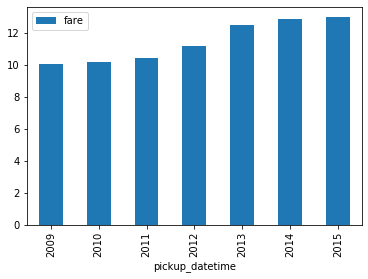

In [8]:
# Evolution du prix en fonction de l'année
Data_Price=data_sample.groupby(data_sample["pickup_datetime"].dt.year).mean()["fare"]
Data_Price=pd.DataFrame(Data_Price)
print(Data_Price)
Data_Price.plot(kind='bar')

pickup_datetime
2009    80597
2010    78977
2011    83390
2012    84189
2013    82207
2014    77645
2015    36851
Name: pickup_datetime, dtype: int64


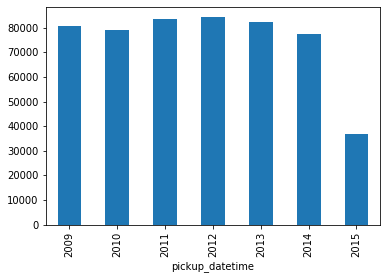

In [9]:
#Représentation des années dans le train sample
Data_Year=data_sample.groupby(data_sample["pickup_datetime"].dt.year).count()["pickup_datetime"]
print(Data_Year)
Data_Year.plot(kind='bar')

passenger_count
0     9.096290
1    11.204349
2    11.797204
3    11.568840
4    11.776281
5    11.243655
6    12.015632
9    72.500000
Name: fare, dtype: float64


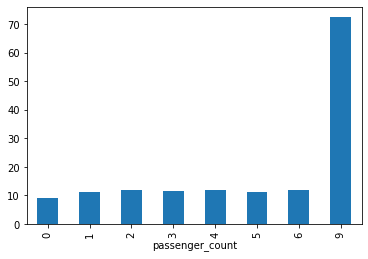

In [10]:
#Représentation des années dans le train sample
Data_Passenger=data_sample.groupby(data_sample["passenger_count"]).mean()["fare"]
print(Data_Passenger)
Data_Passenger.plot(kind='bar')

passenger_count
0      1798
1    362155
2     77555
3     22984
4     11095
5     37109
6     11159
9         1
Name: fare, dtype: int64


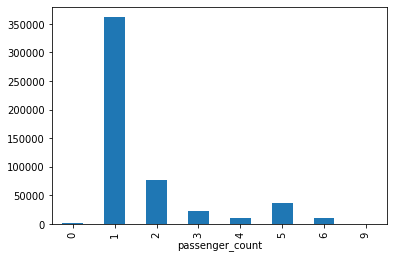

In [11]:
#Représentation des années dans le train sample
Data_Passenger=data_sample.groupby(data_sample["passenger_count"]).count()["fare"]
print(Data_Passenger)
Data_Passenger.plot(kind='bar')

# Data Vis sur le Test

In [18]:
data_path = "DataSet/test.csv"
data_test = pd.read_csv(data_path)
data_test.columns = ["key","pickup_datetime","pickup_longitude",
                       "pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]
data_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [22]:
data_sample["pickup_datetime"] = pd.DatetimeIndex(data_sample["pickup_datetime"])

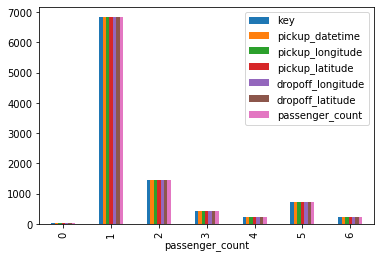

In [20]:
Data_Passenger=data_test.groupby(data_sample["passenger_count"]).count()
Data_Passenger.plot(kind='bar')

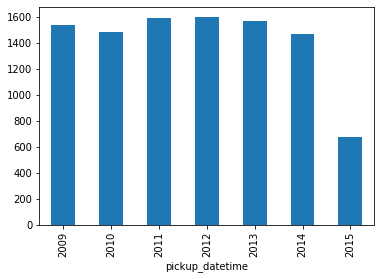

In [26]:
Data_Year=data_test.groupby(data_sample["pickup_datetime"].dt.year).count()["pickup_datetime"]
Data_Year.plot(kind='bar')

# Machine Learning

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
X_Taxi = data_sample.drop(columns=["key","fare","pickup_datetime"])
X_Taxi = X_Taxi.join([X_Taxi, data_sample["pickup_datetime"].dt.year])
Y_Taxi = data_sample2.values[:,1]
X_Taxi_train, X_Taxi_test, Y_Taxi_train, Y_Taxi_test = train_test_split(X_Taxi,Y_Taxi,test_size=0.2)

ValueError: Indexes have overlapping values: Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [27]:
XGBR = XGBRegressor()
XGBR.fit(X_Taxi_train, Y_Taxi_train)
XGBR.score(X_Taxi_test,Y_Taxi_test)
XGBR

[09:52:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [28]:
XGBR.score(X_Taxi_test,Y_Taxi_test)
np.sqrt(mean_squared_error(XGBR.predict(X_Taxi_test),Y_Taxi_test))

5.183296914124494